In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('diamonds.csv', index_col=0)

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
totaltrain, test = train_test_split(data, test_size=0.15)

In [5]:
train, validation = train_test_split(totaltrain, test_size=0.15)

In [6]:
train_one_hot_cut = pd.get_dummies(train['cut'])
train_one_hot_color = pd.get_dummies(train['color'])
train_one_hot_clarity = pd.get_dummies(train['clarity'])

In [7]:
validation_one_hot_cut = pd.get_dummies(validation['cut'])
validation_one_hot_color = pd.get_dummies(validation['color'])
validation_one_hot_clarity = pd.get_dummies(validation['clarity'])

In [8]:
test_one_hot_cut = pd.get_dummies(test['cut'])
test_one_hot_color = pd.get_dummies(test['color'])
test_one_hot_clarity = pd.get_dummies(test['clarity'])

In [9]:
y_train = train.loc[:,'price']
y_validation = validation.loc[:,'price']
y_test = test.loc[:,'price']

In [10]:
x_train = train.drop('price', axis=1)
x_validation = validation.drop('price', axis=1)
x_test = test.drop('price', axis=1)

In [11]:
x_train = x_train.drop('cut', axis=1)
x_train = x_train.drop('color', axis=1)
x_train = x_train.drop('clarity', axis=1)

In [12]:
x_validation = x_validation.drop('cut', axis=1)
x_validation = x_validation.drop('color', axis=1)
x_validation = x_validation.drop('clarity', axis=1)

In [13]:
x_test = x_test.drop('cut', axis=1)
x_test = x_test.drop('color', axis=1)
x_test = x_test.drop('clarity', axis=1)

In [14]:
x_scaler = StandardScaler().fit(x_train)

In [15]:
x_train.head()

,carat,depth,table,x,y,z
10508,1.02,62.1,53.0,6.43,6.38,3.98
38465,0.34,61.6,55.0,4.50,4.52,2.78
7823,1.00,60.3,58.0,6.48,6.45,3.90
11997,1.13,63.4,59.0,6.53,6.59,4.16
26166,2.06,60.8,60.0,8.25,8.16,4.99


In [16]:
x_test.head()

,carat,depth,table,x,y,z
53195,0.70,61.4,57.0,5.76,5.80,3.55
3726,0.36,62.1,56.0,4.55,4.59,2.84
11377,0.34,60.3,57.0,4.53,4.56,2.74
25639,2.04,60.9,57.0,8.14,8.19,4.97
43556,0.52,62.2,54.0,5.14,5.18,3.21


In [17]:
x_train_norm = pd.DataFrame(x_scaler.transform(x_train), columns=x_train.columns, index=x_train.index)
x_validation_norm = pd.DataFrame(x_scaler.transform(x_validation), columns=x_validation.columns, index=x_validation.index)
x_test_norm = pd.DataFrame(x_scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

In [18]:
x_train_norm.head()

,carat,depth,table,x,y,z
10508,0.473443,0.243239,-1.984514,0.627836,0.568465,0.626544
38465,-0.963544,-0.106377,-1.092911,-1.095944,-1.058754,-1.068344
7823,0.431179,-1.015378,0.244494,0.672494,0.629704,0.513551
11997,0.705897,1.152240,0.690295,0.717151,0.752183,0.880777
26166,2.671189,-0.665762,1.136097,2.253370,2.125695,2.053074


In [19]:
x_test_norm.head()

,carat,depth,table,x,y,z
53195,-0.202786,-0.246223,-0.201308,0.029426,0.061052,0.019209
3726,-0.921280,0.243239,-0.647110,-1.051286,-0.997514,-0.983599
11377,-0.963544,-1.015378,-0.201308,-1.069149,-1.023760,-1.124840
25639,2.628925,-0.595839,-0.201308,2.155123,2.151940,2.024826
43556,-0.583165,0.313162,-1.538713,-0.524328,-0.481354,-0.461009


In [20]:
x_train_norm = x_train_norm.join(train_one_hot_cut)
x_train_norm = x_train_norm.join(train_one_hot_color)
x_train_norm = x_train_norm.join(train_one_hot_clarity)

In [21]:
x_validation_norm = x_validation_norm.join(validation_one_hot_cut)
x_validation_norm = x_validation_norm.join(validation_one_hot_color)
x_validation_norm = x_validation_norm.join(validation_one_hot_clarity)

In [22]:
x_test_norm = x_test_norm.join(test_one_hot_cut)
x_test_norm = x_test_norm.join(test_one_hot_color)
x_test_norm = x_test_norm.join(test_one_hot_clarity)

In [23]:
x_train_norm.head()

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
10508,0.473443,0.243239,-1.984514,0.627836,0.568465,0.626544,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
38465,-0.963544,-0.106377,-1.092911,-1.095944,-1.058754,-1.068344,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7823,0.431179,-1.015378,0.244494,0.672494,0.629704,0.513551,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
11997,0.705897,1.152240,0.690295,0.717151,0.752183,0.880777,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26166,2.671189,-0.665762,1.136097,2.253370,2.125695,2.053074,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [24]:
x_test_norm.head()

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
53195,-0.202786,-0.246223,-0.201308,0.029426,0.061052,0.019209,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3726,-0.921280,0.243239,-0.647110,-1.051286,-0.997514,-0.983599,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
11377,-0.963544,-1.015378,-0.201308,-1.069149,-1.023760,-1.124840,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
25639,2.628925,-0.595839,-0.201308,2.155123,2.151940,2.024826,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
43556,-0.583165,0.313162,-1.538713,-0.524328,-0.481354,-0.461009,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Normal Equation

In [25]:
theta_norm = np.dot(np.linalg.pinv(np.dot(np.transpose(x_train_norm),x_train_norm)),np.dot(np.transpose(x_train_norm),y_train))

In [26]:
y_validation_pred_normal = np.dot(theta_norm, np.transpose(x_validation_norm))

In [27]:
metrics.r2_score(y_validation, y_validation_pred_normal)

0.9199965643221781

In [28]:
metrics.mean_absolute_error(y_validation, y_validation_pred_normal)

750.9017180137666

#### Test Dataset - Normal Equation

In [29]:
y_test_pred_normal = np.dot(theta_norm, np.transpose(x_test_norm))

In [30]:
metrics.r2_score(y_test, y_test_pred_normal)

0.9246269126589215

In [31]:
metrics.mean_absolute_error(y_test, y_test_pred_normal)

730.0678729019643

# Linear Regression

In [32]:
learning_rate=0.001
iterations=25

### Scikit-learn implementation

In [33]:
clf = SGDRegressor(eta0=learning_rate, max_iter=iterations,verbose=True, penalty="None", loss="squared_loss", learning_rate="constant", tol=None, shuffle=False, fit_intercept=False)

In [34]:
initial_theta = np.zeros_like(theta_norm)

In [35]:
clf.fit(x_train_norm, y_train, coef_init=initial_theta)

-- Epoch 1
Norm: 7549.12, NNZs: 26, Bias: 0.000000, T: 38971, Avg. loss: 1122452.998972
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 8096.73, NNZs: 26, Bias: 0.000000, T: 77942, Avg. loss: 708687.019940
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 8479.05, NNZs: 26, Bias: 0.000000, T: 116913, Avg. loss: 665344.989374
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 8680.52, NNZs: 26, Bias: 0.000000, T: 155884, Avg. loss: 654187.765279
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 8790.99, NNZs: 26, Bias: 0.000000, T: 194855, Avg. loss: 651855.261582
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 8851.08, NNZs: 26, Bias: 0.000000, T: 233826, Avg. loss: 651070.718684
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 8883.81, NNZs: 26, Bias: 0.000000, T: 272797, Avg. loss: 650852.381900
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 8901.74, NNZs: 26, Bias: 0.000000, T: 311768, Avg. loss: 650777.696708
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=False, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=25, n_iter=None, penalty='None',
       power_t=0.25, random_state=None, shuffle=False, tol=None,
       verbose=True, warm_start=False)

In [36]:
y_validation_pred_SKlearn = clf.predict(x_validation_norm)

In [37]:
metrics.r2_score(y_validation, y_validation_pred_SKlearn)

0.9191048455573211

In [38]:
metrics.mean_absolute_error(y_validation, y_validation_pred_SKlearn)

750.6755377637807

#### Test Dataset - Sklearn

In [39]:
y_test_pred_SKlearn = clf.predict(x_test_norm)

In [40]:
metrics.r2_score(y_test, y_test_pred_SKlearn)

0.9237086503457477

In [41]:
metrics.mean_absolute_error(y_test, y_test_pred_SKlearn)

730.824035185564

### Our implementation

In [65]:
%matplotlib inline
def SGD(theta, x, y, learning_rate, iterations):
    m = x.shape[0]
    iter_average_cost_list =[]
    for i in range(1,iterations+1):
        iter_total_cost = 0
        for item,price in zip(x.values, y.values):
            y_pred = np.dot(item, theta)
            loss = y_pred - price
            cost = np.sum(loss ** 2)/2
            gradient = np.dot(item.transpose(), loss)
            theta = theta - learning_rate * gradient
            iter_total_cost += cost
        iter_average_cost = iter_total_cost/m
        iter_average_cost_list.append(iter_average_cost)
        print("Epoch {}".format(i))
        print("Cost {}".format(iter_average_cost))
        
    fig = plt.figure(1)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel('Iterations')
    plt.ylabel('Average Cost')
    plt.plot(range(1,iterations+1),iter_average_cost_list, '-bo')
    plt.show()
        
    return theta

In [66]:
initial_theta = np.zeros_like(theta_norm)

Epoch 1
Cost 1122452.9989715246
Epoch 2
Cost 708687.0199402953
Epoch 3
Cost 665344.9893741313
Epoch 4
Cost 654187.765279229
Epoch 5
Cost 651855.2615815989
Epoch 6
Cost 651070.7186839299
Epoch 7
Cost 650852.3818998894
Epoch 8
Cost 650777.6967076014
Epoch 9
Cost 650751.8063012393
Epoch 10
Cost 650741.531846708
Epoch 11
Cost 650737.0550667058
Epoch 12
Cost 650734.89234953
Epoch 13
Cost 650733.7697866405
Epoch 14
Cost 650733.1581008974
Epoch 15
Cost 650732.8153611313
Epoch 16
Cost 650732.620440589
Epoch 17
Cost 650732.508790891
Epoch 18
Cost 650732.4446521248
Epoch 19
Cost 650732.4077798076
Epoch 20
Cost 650732.3865896118
Epoch 21
Cost 650732.3744213847
Epoch 22
Cost 650732.3674404335
Epoch 23
Cost 650732.3634391422
Epoch 24
Cost 650732.3611476722
Epoch 25
Cost 650732.3598363453


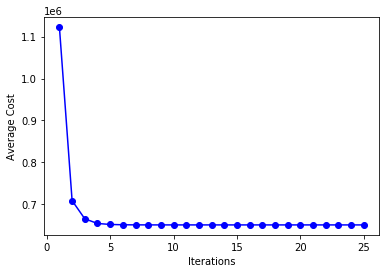

In [67]:
theta_sgd = SGD(initial_theta, x_train_norm, y_train, learning_rate, iterations)

In [68]:
y_validation_pred_our = np.dot(theta_sgd, np.transpose(x_validation_norm))

In [69]:
metrics.r2_score(y_validation, y_validation_pred_our)

0.9191048455573211

In [70]:
metrics.mean_absolute_error(y_validation, y_validation_pred_our)

750.6755377637807

#### Test Dataset - Our Implementation

In [71]:
y_test_pred_our = np.dot(theta_sgd, np.transpose(x_test_norm))

In [72]:
metrics.r2_score(y_test, y_test_pred_our)

0.9237086503457477

In [73]:
metrics.mean_absolute_error(y_test, y_test_pred_our)

730.8240351855641

## Gridsearch

In [74]:
learning_rate_list = [10**i for i in range(-6,-2)]

In [75]:
learning_rate_list

[1e-06, 1e-05, 0.0001, 0.001]

In [76]:
iterations_list = np.linspace(0, 200, 9)[1:]

In [77]:
iterations_list

array([ 25.,  50.,  75., 100., 125., 150., 175., 200.])

In [78]:
results_gridsearch = []
for learning_rate in learning_rate_list:
    for iteration in iterations_list:
        clf = SGDRegressor(eta0=learning_rate, max_iter=iteration,verbose=False, penalty="None", loss="squared_loss", learning_rate="constant", tol=None, shuffle=False, fit_intercept=False)
        initial_theta = np.zeros_like(theta_norm)
        clf.fit(x_train_norm, y_train, coef_init=initial_theta)
        y_validation_pred_SKlearn = clf.predict(x_validation_norm)
        r2_metric = metrics.r2_score(y_validation, y_validation_pred_SKlearn)
        mae_metric = metrics.mean_absolute_error(y_validation, y_validation_pred_SKlearn)
        results_gridsearch.append([learning_rate,iteration,r2_metric,mae_metric])

In [79]:
results = np.array(results_gridsearch)

In [80]:
result_idx = results[:,3].argsort()
results = results[result_idx]
results = results[results[..., 2] >= 0.7]

In [81]:
print(results)

[[1.00000000e-03 2.50000000e+01 9.19104846e-01 7.50675538e+02]
 [1.00000000e-03 5.00000000e+01 9.19104846e-01 7.50675552e+02]
 [1.00000000e-03 2.00000000e+02 9.19104846e-01 7.50675552e+02]
 [1.00000000e-03 1.25000000e+02 9.19104846e-01 7.50675552e+02]
 [1.00000000e-03 7.50000000e+01 9.19104846e-01 7.50675552e+02]
 [1.00000000e-03 1.50000000e+02 9.19104846e-01 7.50675552e+02]
 [1.00000000e-03 1.00000000e+02 9.19104846e-01 7.50675552e+02]
 [1.00000000e-03 1.75000000e+02 9.19104846e-01 7.50675552e+02]
 [1.00000000e-04 2.00000000e+02 9.19897296e-01 7.51255841e+02]
 [1.00000000e-04 1.75000000e+02 9.19897241e-01 7.51256809e+02]
 [1.00000000e-04 1.50000000e+02 9.19897017e-01 7.51260610e+02]
 [1.00000000e-04 1.25000000e+02 9.19896103e-01 7.51275556e+02]
 [1.00000000e-04 1.00000000e+02 9.19892251e-01 7.51334658e+02]
 [1.00000000e-04 7.50000000e+01 9.19874123e-01 7.51579788e+02]
 [1.00000000e-04 5.00000000e+01 9.19758842e-01 7.52726790e+02]
 [1.00000000e-04 2.50000000e+01 9.18543941e-01 7.598377

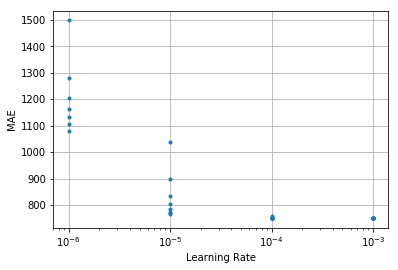

In [82]:
plt.semilogx(results[:,0],results[:,3],'.')
plt.xlabel('Learning Rate')
plt.ylabel('MAE')
plt.grid()
plt.show()

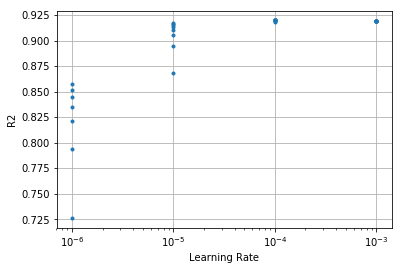

In [83]:
plt.semilogx(results[:,0],results[:,2],'.')
plt.xlabel('Learning Rate')
plt.ylabel('R2')
plt.grid()
plt.show()

## Feature Selection

In [84]:
model_sfm = SelectFromModel(clf, prefit=True)
feature_mask = model_sfm.get_support()
feature_name = np.array(x_train_norm.columns)
print(np.array(feature_name)[feature_mask==True])

['carat' 'Good' 'Ideal' 'Premium' 'Very Good' 'D' 'E' 'F' 'I1' 'IF' 'VS1'
 'VVS1' 'VVS2']


In [85]:
x_train_selected = model_sfm.transform(x_train_norm)
x_test_selected = model_sfm.transform(x_test_norm)

In [86]:
clf.fit(x_train_selected, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=False, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=200.0, n_iter=None, penalty='None',
       power_t=0.25, random_state=None, shuffle=False, tol=None,
       verbose=False, warm_start=False)

In [87]:
clf.score(x_test_selected, y_test)

0.888415804394709